[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


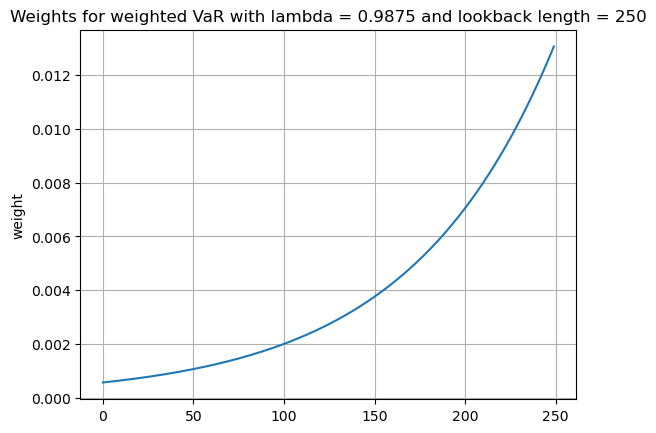

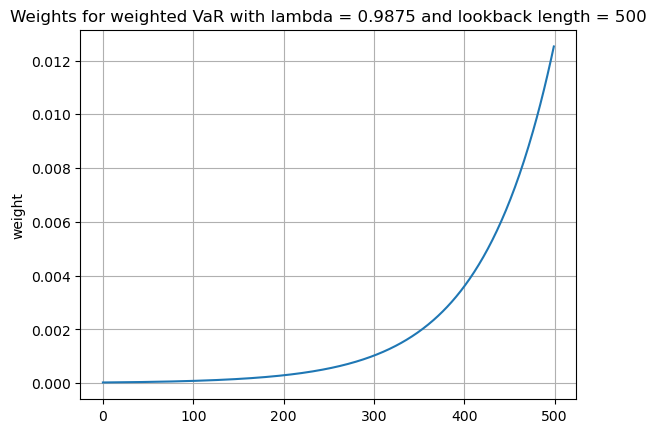

In [1]:
"""
Original file is located at
    https://colab.research.google.com/drive/1kMeiqKfFiZf72Omij-pxPyLxDAPSY6Rk
"""

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.stats as sps
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import matplotlib.dates as mdates

from stockdata import StockData


# Uploading the data

# SP500：标普500指数（^GSPC），从2019年1月1日到2024年1月1日。
# DAX：德国DAX指数（^GDAXI），从2019年1月1日到2024年1月1日。
# FTSE：英国富时100指数（^FTSE），从2019年1月1日到2024年1月1日。
# NIKKEI：日本日经225指数（^N225），从2019年1月1日到2024年1月1日。

SP500 = StockData("^GSPC", 2019, 1, 1, 2024, 1, 1)
DAX = StockData("^GDAXI", 2019, 1, 1, 2024, 1, 1)
FTSE = StockData("^FTSE", 2019, 1, 1, 2024, 1, 1)
NIKKEI = StockData("^N225", 2019, 1, 1, 2024, 1, 1)

# lam：用于加权的衰减因子（lambda），取值为0.9875。
# n：回溯窗口的长度，设置为250天。

lam = 0.9875
n = 250

weights = np.zeros(n)
for i in range(n):
  weights[i] = (1-lam)*(lam**i) / (1-lam**n) # 这个公式计算出每一天的权重，整个数组value从大到小

# 因为计算出的权重是从旧数据到新数据的顺序排列，所以需要使用 np.flip 翻转数组，使其从新到旧排列。
weights = np.flip(weights) # reversed weights
plt.plot(weights)
plt.grid()
plt.title(f"Weights for weighted VaR with lambda = {lam} and lookback length = {n}")
plt.ylabel("weight")
plt.show()

lam = 0.9875
n = 500
weights = np.zeros(n)
for i in range(n):
  weights[i] = (1-lam)*(lam**i) / (1-lam**n)
weights = np.flip(weights) # reversed weights
plt.plot(weights)
plt.grid()
plt.title(f"Weights for weighted VaR with lambda = {lam} and lookback length = {n}")
plt.ylabel("weight")
plt.show()


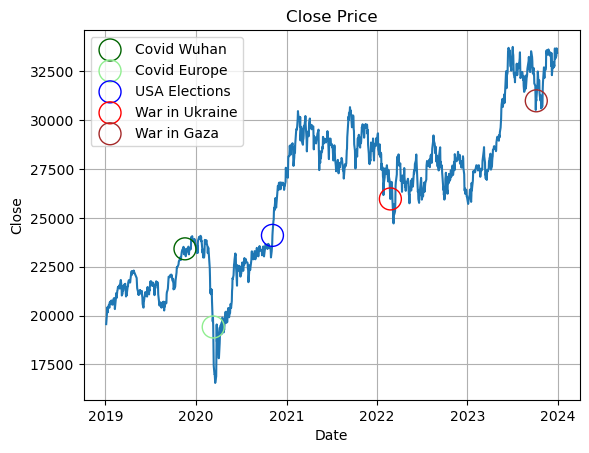

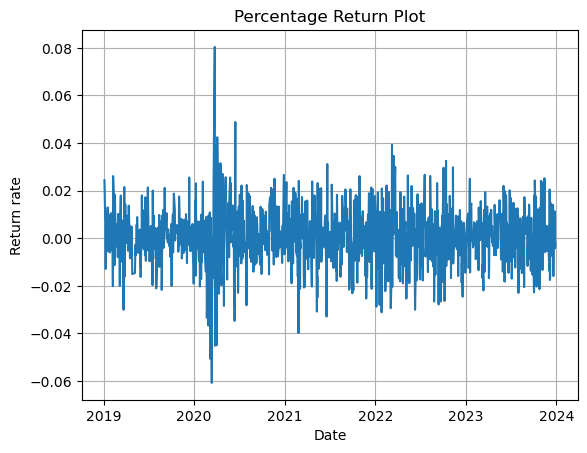

P-value of Shapiro-Wilk test is: 1.4234176920371704e-15
Null hypothesis of normality is rejected at the 0.99 level of significance
Ljung-Box test:
      lb_stat  lb_pvalue
34  43.077152   0.136757
Levene test: W-statistic=11.198327514885243, p-value=6.349891509572685e-09
ADF test: ADF statistic=-22.82636768832198, p-value=0.0
Critical value (1%): -3.435743555099632
Critical value (5%): -2.8639217381867486
Critical value (10%): -2.568038075665972


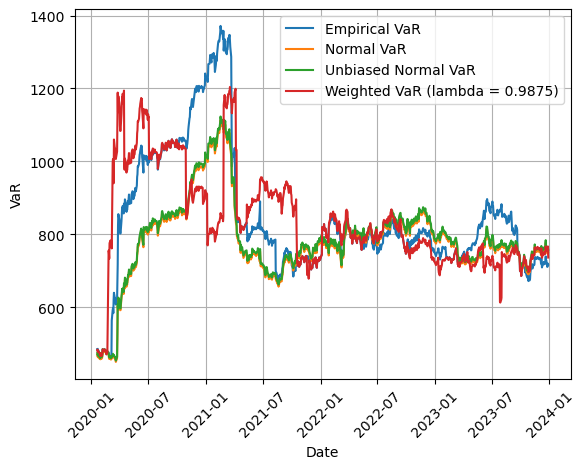

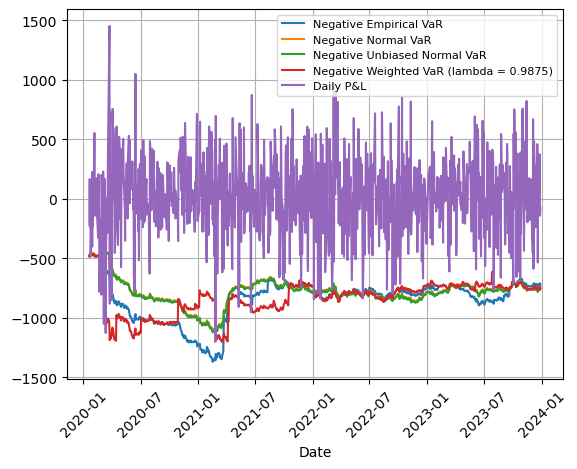

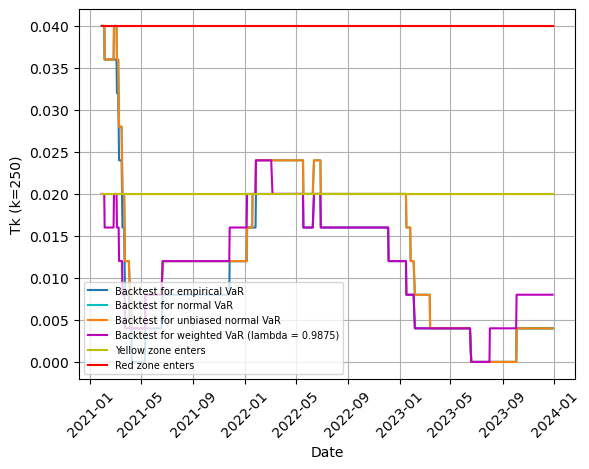

Number of exceptions = 17
Yellow zone, watch out!
Number of exceptions = 19
Yellow zone, watch out!
Number of exceptions = 19
Yellow zone, watch out!


[*********************100%%**********************]  1 of 1 completed

Number of exceptions = 14
Yellow zone, watch out!


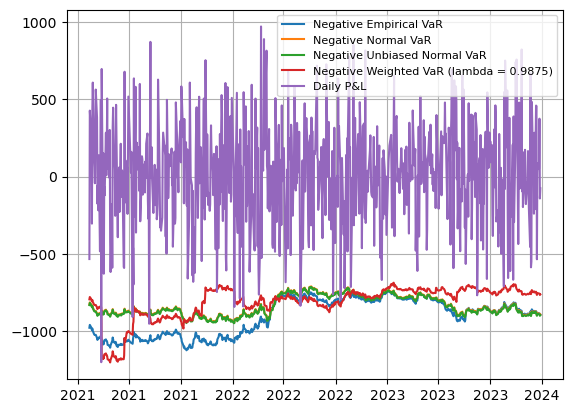

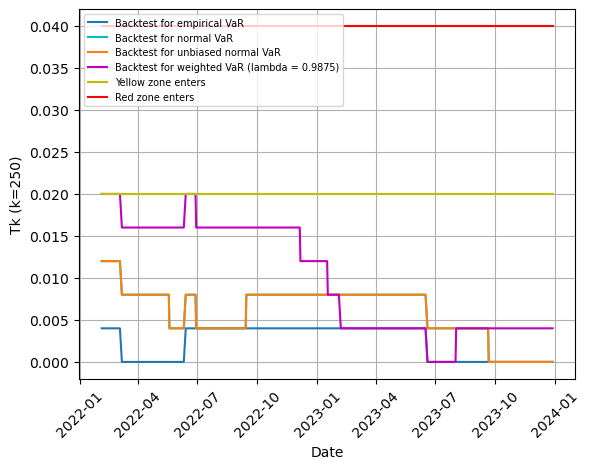

Number of exceptions = 2
Green zone, model looks to be correct
Number of exceptions = 5
Green zone, model looks to be correct
Number of exceptions = 5
Green zone, model looks to be correct
Number of exceptions = 7
Green zone, model looks to be correct


In [2]:
"""# NIKKEI

## Plots and tests
"""

NIKKEI.Plot()

NIKKEI.ReturnPlot()

NIKKEI.ShapiroWilk(0.99)
NIKKEI.LjungBox()
NIKKEI.Levene()
NIKKEI.Adf()

"""## VaR estimation"""

figure, axes = plt.subplots()
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.plot(NIKKEI.historicalData.index[250: -1], NIKKEI.Historical_Var(), label = 'Empirical VaR')
plt.plot(NIKKEI.historicalData.index[250: -1], NIKKEI.VarNorm(), label = 'Normal VaR')
plt.plot(NIKKEI.historicalData.index[250: -1], NIKKEI.VarUnbNorm(), label = 'Unbiased Normal VaR')
plt.plot(NIKKEI.historicalData.index[250: -1], NIKKEI.VarWeighted(lam = 0.9875), label = 'Weighted VaR (lambda = 0.9875)')
plt.xlabel("Date")
plt.ylabel("VaR")
plt.grid()
plt.legend()
plt.show()

"""##Backtesting

### lookback 250 days
"""

lam = 0.9875

figure, axes = plt.subplots()
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.plot(NIKKEI.historicalData.index[250: -1], -NIKKEI.Historical_Var(), label = 'Negative Empirical VaR')
plt.plot(NIKKEI.historicalData.index[250: -1], -NIKKEI.VarNorm(), label = 'Negative Normal VaR')
plt.plot(NIKKEI.historicalData.index[250: -1], -NIKKEI.VarUnbNorm(), label = 'Negative Unbiased Normal VaR')
plt.plot(NIKKEI.historicalData.index[250: -1], -NIKKEI.VarWeighted(lam = lam), label = f'Negative Weighted VaR (lambda = {lam})')
plt.plot(NIKKEI.historicalData.index[250: -1], NIKKEI.PnL()[250:], label = 'Daily P&L')
plt.xlabel("Date")
plt.grid()
plt.legend(fontsize = "8")
plt.show()

lam = 0.9875

figure, axes = plt.subplots()
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.plot(NIKKEI.historicalData.index[500: -1], NIKKEI.Backtest_daily(NIKKEI.Historical_Var()), label = 'Backtest for empirical VaR')
plt.plot(NIKKEI.historicalData.index[500: -1], NIKKEI.Backtest_daily(NIKKEI.VarNorm()), label = 'Backtest for normal VaR', c = "c")
plt.plot(NIKKEI.historicalData.index[500: -1], NIKKEI.Backtest_daily(NIKKEI.VarUnbNorm()), label = 'Backtest for unbiased normal VaR')
plt.plot(NIKKEI.historicalData.index[500: -1], NIKKEI.Backtest_daily(NIKKEI.VarWeighted(lam = lam)), label = f'Backtest for weighted VaR (lambda = {lam})', c = "m")
plt.plot(NIKKEI.historicalData.index[500: -1], np.full(len(NIKKEI.Backtest_daily(NIKKEI.Historical_Var())), 0.02), label = 'Yellow zone enters', c = "y")
plt.plot(NIKKEI.historicalData.index[500: -1], np.full(len(NIKKEI.Backtest_daily(NIKKEI.Historical_Var())), 0.04), label = 'Red zone enters', c = "r")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Tk (k=250)")
plt.legend(fontsize = "7")
plt.show()

"""We can perform backtesting for all 1007 calculated VaRs. Then the green zone"""

NIKKEI.Backtest(NIKKEI.Historical_Var())
NIKKEI.Backtest(NIKKEI.VarNorm())
NIKKEI.Backtest(NIKKEI.VarUnbNorm())
NIKKEI.Backtest(NIKKEI.VarWeighted(0.9875))

"""### lookback 500 days"""

NIKKEI2 = StockData("^N225", 2019, 1, 1, 2024, 1, 1, lookback = 500)

lam = 0.9875
figure, axes = plt.subplots()
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.plot(NIKKEI2.historicalData.index[500: -1], -NIKKEI2.Historical_Var(), label = 'Negative Empirical VaR')
plt.plot(NIKKEI2.historicalData.index[500: -1], -NIKKEI2.VarNorm(), label = 'Negative Normal VaR')
plt.plot(NIKKEI2.historicalData.index[500: -1], -NIKKEI2.VarUnbNorm(), label = 'Negative Unbiased Normal VaR')
plt.plot(NIKKEI2.historicalData.index[500: -1], -NIKKEI2.VarWeighted(lam), label = f'Negative Weighted VaR (lambda = {lam})')
plt.plot(NIKKEI2.historicalData.index[500: -1], NIKKEI2.PnL()[500:], label = 'Daily P&L')
plt.grid()
plt.legend(fontsize = "8")
plt.show()

lam = 0.9875

figure, axes = plt.subplots()
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.plot(NIKKEI2.historicalData.index[750: -1], NIKKEI2.Backtest_daily(NIKKEI2.Historical_Var()), label = 'Backtest for empirical VaR')
plt.plot(NIKKEI2.historicalData.index[750: -1], NIKKEI2.Backtest_daily(NIKKEI2.VarNorm()), label = 'Backtest for normal VaR', c = "c")
plt.plot(NIKKEI2.historicalData.index[750: -1], NIKKEI2.Backtest_daily(NIKKEI2.VarUnbNorm()), label = 'Backtest for unbiased normal VaR')
plt.plot(NIKKEI2.historicalData.index[750: -1], NIKKEI2.Backtest_daily(NIKKEI2.VarWeighted(lam = lam)), label = f'Backtest for weighted VaR (lambda = {lam})', c = "m")
plt.plot(NIKKEI2.historicalData.index[750: -1], np.full(len(NIKKEI2.Backtest_daily(NIKKEI2.Historical_Var())), 0.02), label = 'Yellow zone enters', c = "y")
plt.plot(NIKKEI2.historicalData.index[750: -1], np.full(len(NIKKEI2.Backtest_daily(NIKKEI2.Historical_Var())), 0.04), label = 'Red zone enters', c = "r")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Tk (k=250)")
plt.legend(fontsize = "7")
plt.show()

NIKKEI2.Backtest2(NIKKEI2.Historical_Var())
NIKKEI2.Backtest2(NIKKEI2.VarNorm())
NIKKEI2.Backtest2(NIKKEI2.VarUnbNorm())
NIKKEI2.Backtest2(NIKKEI2.VarWeighted(0.9875))
